In [2]:
import subprocess
import os
import sys

import matplotlib.backends.backend_pdf
import scanpy as sc
import matplotlib.pyplot as pl
import anndata as ad
import pandas as pd
import numpy as np
import seaborn as sns
import scvelo as scv
scv.settings.verbosity=1

# Jupyter stuff
from tqdm.notebook import tqdm
from IPython.display import clear_output
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline

# Custom functions
sys.path.insert(1, '../..')
from utils import *

In [3]:
sys.path.insert(1, '/fast/work/users/peidlis_c/utils/single_cell_rna_seq/scrnaseq_utils/')
# sys.path.insert(1, '/extra/stefan/utils/scrnaseq_utils/')
from scrnaseq_util_functions import *
data_path = '/fast/work/users/peidlis_c/data/perturbation_resource_paper/'

In [4]:
data_path = '/fast/work/users/peidlis_c/data/perturbation_resource_paper/'


h5_files = {}
for path, subdirs, files in os.walk(data_path):
    for name in files:
        if '.h5' in name: h5_files[name[:-3]] = os.path.join(path, name)
for k in ['exampledataset', 'NormanWeissman2019_raw']:
    if k in h5_files.keys(): del h5_files[k]
for k in ['PapalexiSatija2021_eccite_arrayed_protein', 'PapalexiSatija2021_eccite_protein', 'FrangiehIzar2021_protein']:
    if k in h5_files.keys(): del h5_files[k]
for k in ['gene_scores', 'ChromVar', 'LSI_embedding', 'markerpeak_target', 'peak_bc']:
    if k in h5_files.keys(): del h5_files[k]

print(len(h5_files))
list(h5_files.keys())

34


['PapalexiSatija2021_eccite_arrayed_RNA',
 'PapalexiSatija2021_eccite_RNA',
 'TianKampmann2021_CRISPRa',
 'TianKampmann2021_CRISPRi',
 'XieHon2017',
 'AissaBenevolenskaya2021',
 'McFarlandTshemiak2020_all_expts_combined',
 'GasperiniShendure2019_lowMOI',
 'GasperiniShendure2019_atscale',
 'GasperiniShendure2019_highMOI',
 'ZhaoSims2021',
 'DixitRegev2016',
 'DatlingerBock2017',
 'DatlingerBock2021',
 'FrangiehIzar2021_RNA',
 'WeinrebKlein2020',
 'ShifrutMarson2018',
 'ReplogleWeissman2022_K562_essential',
 'ReplogleWeissman2022_K562_gwps',
 'ReplogleWeissman2022_rpe1',
 'ChangYe2021',
 'SchiebingerLander2019_GSE115943',
 'SchiebingerLander2019_GSE106340',
 'NormanWeissman2019_filtered',
 'SchraivogelSteinmetz2020_TAP_SCREEN__chromosome_11_screen',
 'SchraivogelSteinmetz2020_TAP_SCREEN__chromosome_8_screen',
 'AdamsonWeissman2016_GSM2406677_10X005',
 'AdamsonWeissman2016_GSM2406681_10X010',
 'AdamsonWeissman2016_GSM2406675_10X001',
 'SrivatsanTrapnell2020_sciplex2',
 'SrivatsanTrapnell2

In [5]:
h5_files['PapalexiSatija2021_eccite_arrayed_RNA']

'/fast/work/users/peidlis_c/data/perturbation_resource_paper/PapalexiSatija2021/eccite_arrayed/RNA/PapalexiSatija2021_eccite_arrayed_RNA.h5'

In [4]:
def plot_heatmap(tab, title, ax):
    if 'simple_confusion' in title:
        tab = pd.DataFrame(zscore(tab.values, axis=0), tab.index, tab.columns)
        tab = 0.5 * (tab+tab.T)
        tab = cluster_matrix(tab, 'both')
    sns.heatmap(tab, robust=True, ax=ax)
    ax.set_xticks(np.arange(len(tab))+.5)
    ax.set_xticklabels(tab.index, fontsize=6)
    ax.set_yticks(np.arange(len(tab))+.5)
    ax.set_yticklabels(tab.index, fontsize=6)
    ax.set_title(title)

In [5]:
tres = get_subfolders('./analysis_screens/tessa_results/', False)

In [6]:
modes=['simple_confusion', 'graph_entropy', 'pairwise_pca_distances', 'pseudobulk_distances', 'pseudobulk_correlations']
N = len(modes)

# Drug example dataset

In [7]:
key = 'ZhaoSims2021'

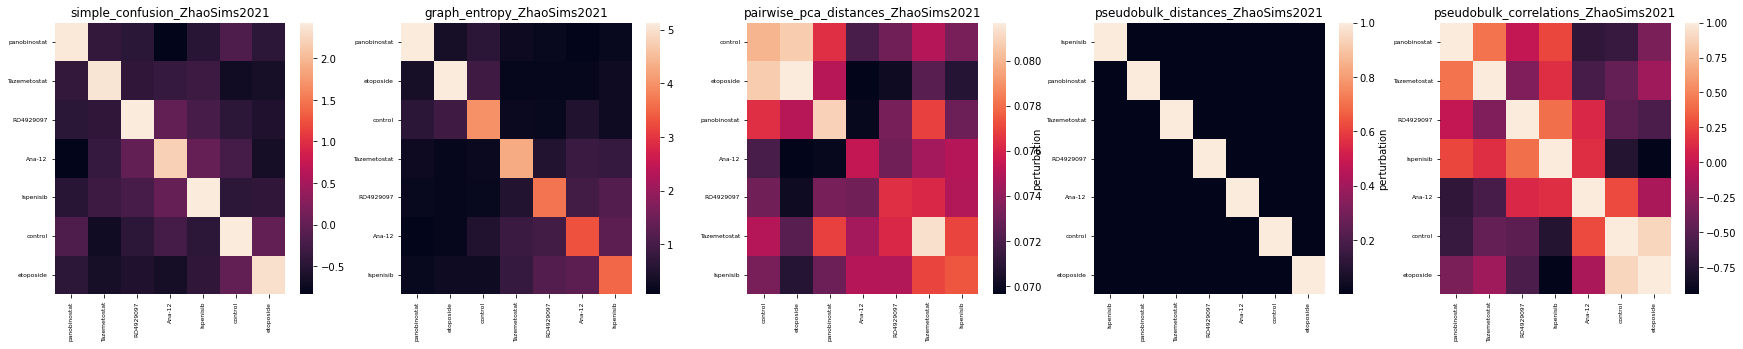

In [13]:
fig, axs = pl.subplots(1,N, figsize=[6*N, 5], sharex=False, sharey=False)
for mode, ax in zip(modes, axs):
    try:
        tab = pd.read_csv(f'./analysis_screens/tables/{mode}_{key}_tables.csv', index_col=0)
        # tab = tab - np.diag(np.diag(tab.values))
        plot_heatmap(tab, f'{mode}_{key}', ax)
    except:
        pass
pl.show()

In [11]:
tab

,panobinostat,Tazemetostat,RO4929097,Ispenisib,Ana-12,control,etoposide
perturbation,,,,,,,
panobinostat,1.000000,0.422764,-0.016349,0.249725,-0.698389,-0.660204,-0.334458
Tazemetostat,0.422764,1.000000,-0.321072,0.144130,-0.574222,-0.438660,-0.180355
RO4929097,-0.016349,-0.321072,1.000000,0.410244,0.114971,-0.482313,-0.559542
Ispenisib,0.249725,0.144130,0.410244,1.000000,0.141989,-0.761746,-0.946580
Ana-12,-0.698389,-0.574222,0.114971,0.141989,1.000000,0.263700,-0.122401
control,-0.660204,-0.438660,-0.482313,-0.761746,0.263700,1.000000,0.891451
etoposide,-0.334458,-0.180355,-0.559542,-0.946580,-0.122401,0.891451,1.000000


# Crispr example dataset

In [15]:
key = 'PapalexiSatija2021_eccite_RNA'

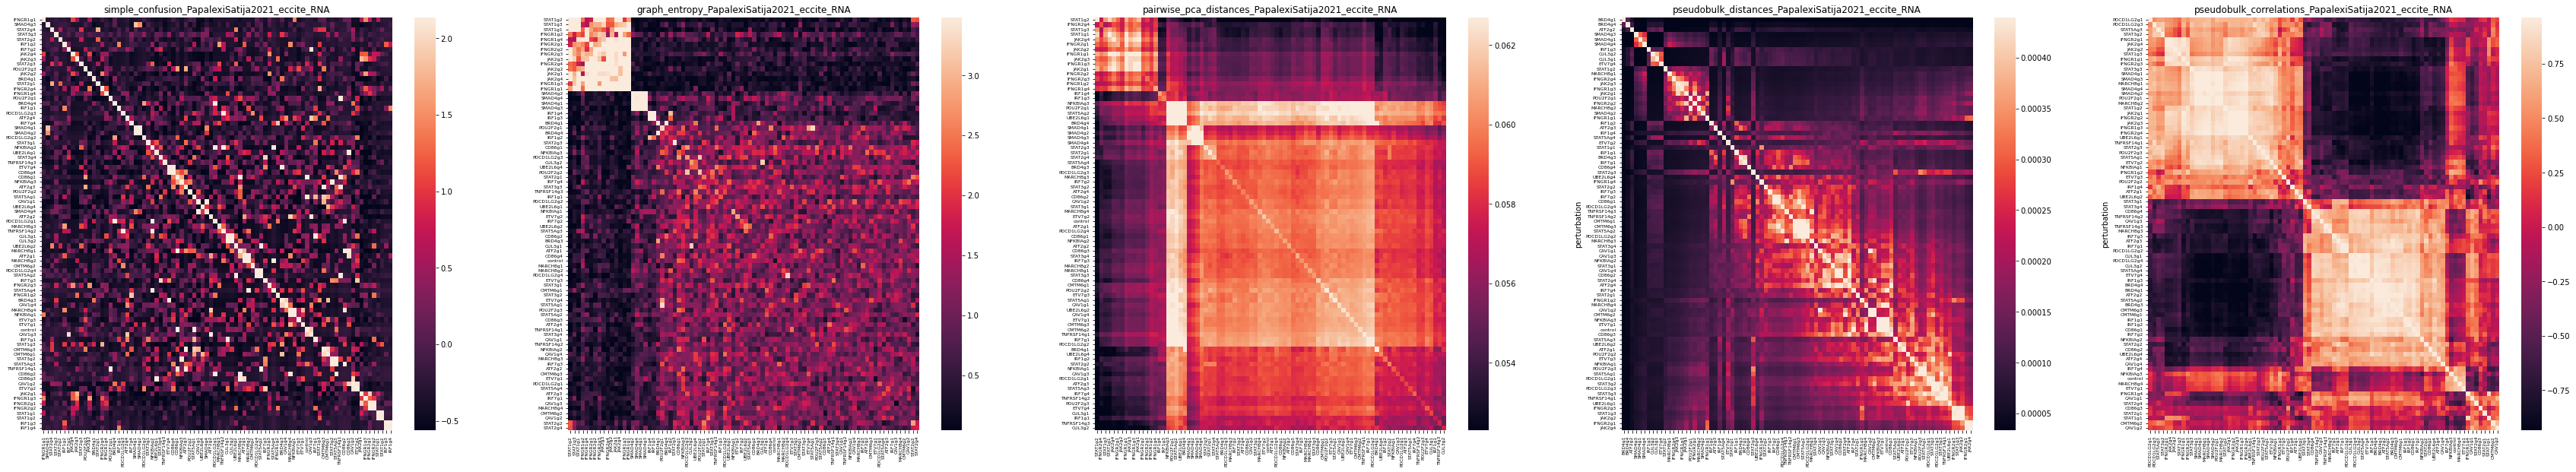

In [17]:
fig, axs = pl.subplots(1,N, figsize=[12*N, 10], sharex=False, sharey=False)
for mode, ax in zip(modes, axs):
    try:
        tab = pd.read_csv(f'./analysis_screens/tables/{mode}_{key}_tables.csv', index_col=0)
        tab = cluster_matrix(tab, 'both')
        plot_heatmap(tab, f'{mode}_{key}', ax)
    except:
        pass
pl.show()

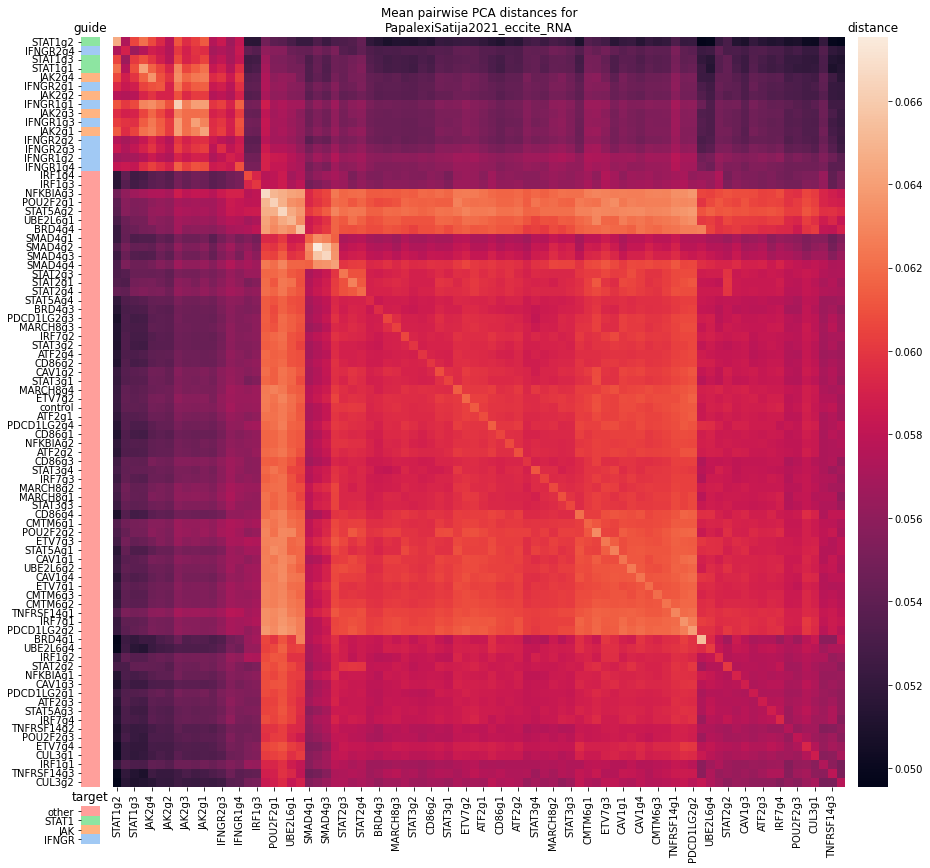

In [48]:
axs=heatmap_with_cats(tab,
    col_labels=None,
    row_labels=['JAK' if 'JAK' in x else 
                'STAT1' if 'STAT1' in x else 
                'IFNGR' if 'IFNGR' in x else 
                'other'
                for x in tab.index],
    show=False,
    figsize=[14, 14],
    col_rot=0,
    row_rot=0,
    col_cmap='tab10',
    row_cmap='pastel',
    width_ratios=(0.5, 20, 0.8),
    height_ratios=(10, .5),)
axs['caxx'].set_title('target')
axs['cax'].set_title('distance')
axs['ax_y'].set_title('guide')
axs['ax'].set_title(f'Mean pairwise PCA distances for\n{key}')
pl.show()

In [51]:
modes

['simple_confusion',
 'graph_entropy',
 'pairwise_pca_distances',
 'pseudobulk_distances',
 'pseudobulk_correlations']

In [54]:
def pairwise_pca_distances(adata, obs_key, obsm_key='X_pca', cluster=True):
    perturbations = pd.unique(adata.obs.perturbation)
    df = pd.DataFrame(index=perturbations, columns=perturbations, dtype=float)
    for i, p1 in enumerate(tqdm(perturbations)):
        for p2 in perturbations[i:]:
            x1 = adata[adata.obs.perturbation==p1].obsm[obsm_key].copy()
            x2 = adata[adata.obs.perturbation==p2].obsm[obsm_key].copy()
            pwd = pairwise_distances(x1, x2)
            factor = len(pwd)**2 if p1!=p2 else len(pwd)**2 - len(pwd)  # correct mean for zero diagonal if comparing to same set
            mean_pwd = np.sum(pwd)  / factor
            df.loc[p1, p2] = mean_pwd
            df.loc[p2, p1] = mean_pwd
    return df

100%|██████████| 168/168 [03:49<00:00,  1.36s/it]


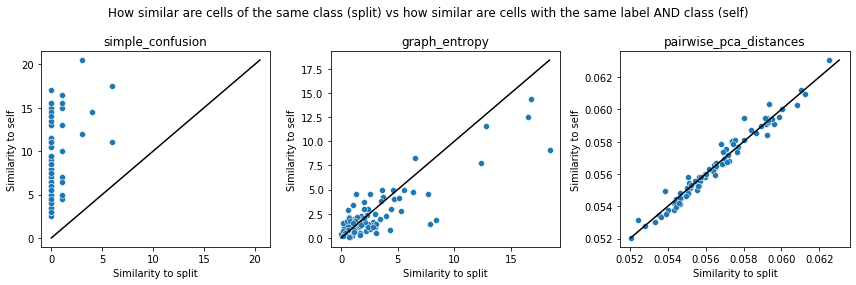

In [64]:
modes = ['simple_confusion', 'graph_entropy', 'pairwise_pca_distances']
N = len(modes)
fig, axs = pl.subplots(1,N,figsize=[4*N, 4])
tabs = {}
for ax, mode in zip(axs, modes):
    sim = pd.read_csv(f'./analysis_screens/tables/split_{mode}_{key}_tables.csv', index_col=0)
    if mode==modes[2]:
        SDIR = "/fast/scratch/users/peidlis_c/perturbation_resource_paper/"
        adata = sc.read(SDIR+'tmp_split_data_' + key + '.h5')
        sim_ = pairwise_pca_distances(adata, 'perturbation', cluster=False)
        sim = cluster_matrix(1/(sim_+1), 'both')
    
    classes = pd.unique([x.replace('_X', '') for x in sim.index])
    res = {}
    for c in classes:
        res[c] = [sim.loc[c, c+'_X'], np.mean([sim.loc[c, c], sim.loc[c+'_X', c+'_X']])]
    df = pd.DataFrame(res, index=['split', 'self']).T
    
    sns.scatterplot(data=df, x='split', y='self', ax=ax)
    m = np.max(df.values)
    n = np.min(df.values)
    ax.plot([n,m], [n,m], c='k')
    ax.set_title(mode)
    ax.set_ylabel('Similarity to self')
    ax.set_xlabel('Similarity to split')
pl.suptitle('How similar are cells of the same class (split) vs how similar are cells with the same label AND class (self)')
pl.tight_layout()
pl.show()